In [2]:
import nest_asyncio
import prompts
import importlib
import state 
import nodes 
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
from typing import Dict, Any, Tuple, Literal
from langgraph.prebuilt import ToolNode
from langchain_core.tools import tool
from langchain_core.messages import ToolMessage
import os
from openai import OpenAI
from dotenv import load_dotenv
importlib.reload(prompts)
importlib.reload(state)
importlib.reload(nodes)
from nodes import assistant, summarize_packets, execute_tools
from state import HoneypotStateReact
nest_asyncio.apply()


def display_graph(graph, width=500, height=600):

    png_bytes = graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)

    display(Image(data=png_bytes, format="png", width=width, height=height)
)

def is_api_key_valid():
    try:
        client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
        response = client.responses.create(
            model="gpt-4o",
            instructions="Test API key",
            input="Test API key",
            max_output_tokens=16
            )
    except Exception as e:
        print(f"Error: {e}")
        return False
    else:
        return True

In [3]:

# Load environment variables
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
#  Check the validity of the API key
api_key_valid = is_api_key_valid()
print("API key is valid:", api_key_valid)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"


API key is valid: True


In [4]:
def should_continue(state: HoneypotStateReact) -> Literal["tools", "summarize", "__end__"]:
    """Determine next action based on the last message"""
    last_message = state.messages[-1]
    
    # If the last message has tool calls, execute them
    if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
        return "tools"
    
    # Check if we need to summarize packet data
    if state.network_packets and not state.packet_summary:
        return "summarize"
    
    # if state.pending_tool_calls:
    #     return "tools"
    
    # Otherwise, we're done
    return "__end__"

In [5]:
# Build the graph
def build_react_graph():
    """Build the LangGraph workflow"""
    builder = StateGraph(HoneypotStateReact)
    
    # Add nodes
    builder.add_node("assistant", assistant)
    builder.add_node("tools", execute_tools)
    builder.add_node("summarize", summarize_packets)
    
    # Add edges
    builder.add_edge(START, "assistant")
    builder.add_conditional_edges("assistant", should_continue)
    builder.add_edge("tools", "assistant")
    builder.add_edge("summarize", "assistant")
    
    return builder.compile()


INFO:pyppeteer.launcher:Browser listening on: ws://127.0.0.1:40703/devtools/browser/7528f73e-4f68-4737-9b16-3af69763e2fc
INFO:pyppeteer.launcher:terminate chrome process...


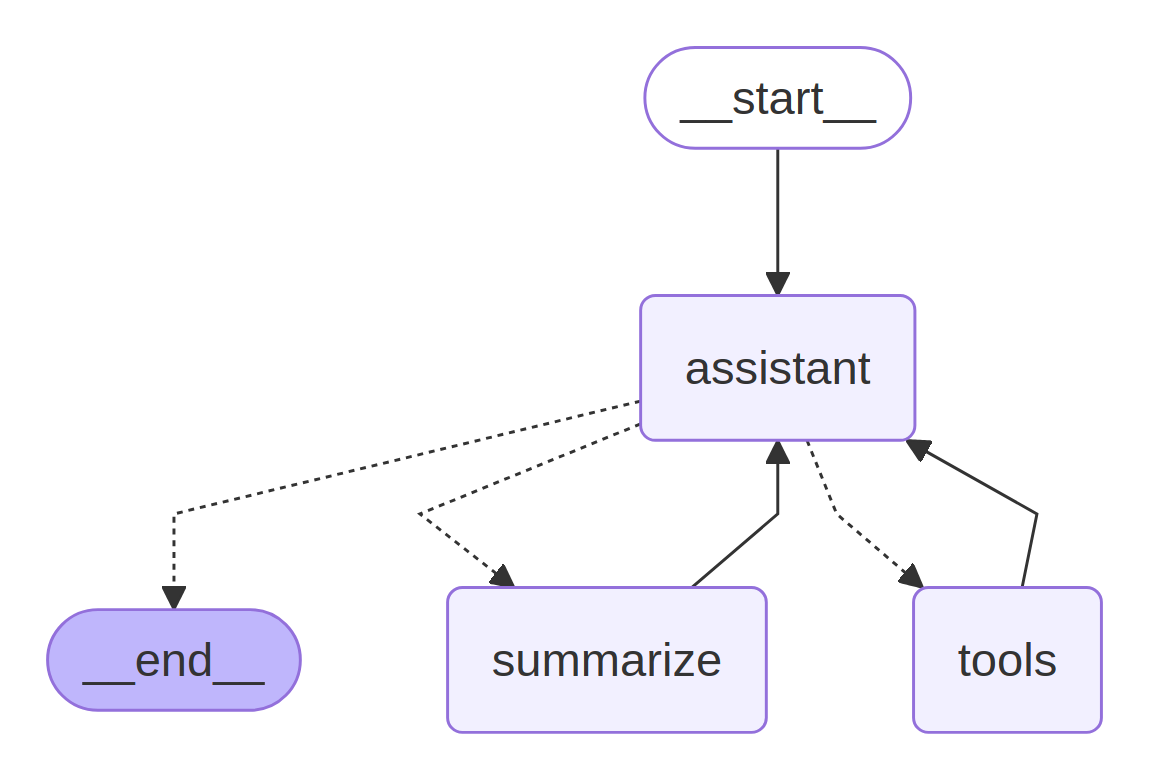

In [6]:
graph = build_react_graph()
display_graph(graph)

In [7]:
# Create an initial state
initial_state = HoneypotStateReact()
response = graph.invoke(initial_state)

network packets: []
firewall_rules: []
honeypot_config[]
services_health: ['', '']


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:tools:Retrieving services status
INFO:tools:Successfully retrieve services health


network packets: []
firewall_rules: []
honeypot_config[]
services_health: ['up', 'up']


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:tools:Retrieving firewall rules...
INFO:tools:Retrieving packets (limit: 100, protocol: None, direction: inbound)
INFO:tools:Successfully retrieved firewall rules


network packets: {'network_packets': {'success': True, 'data': {'count': 100, 'packets': [{'application': 'HTTP', 'capture_time': 1749295210.082191, 'dest_ip': '192.168.100.2', 'dest_port': 45584, 'direction': 'inbound', 'flags_info': 'Flags [S.], seq 3274121407, ack 2591647724, win 65160, options [mss 1460,sackOK,TS val 3241521352 ecr 3208354552,nop,wscale 7], length 0', 'packet_id': 6190, 'protocol': 'TCP', 'raw_header': '11:20:09.993247 eth2  In  IP 172.20.0.5.80 > 192.168.100.2.45584: Flags [S.], seq 3274121407, ack 2591647724, win 65160, options [mss 1460,sackOK,TS val 3241521352 ecr 3208354552,nop,wscale 7], length 0', 'raw_payload': "E..<..@.@.i.......d..P...' ..yg................\n.5...;......", 'source_ip': '172.20.0.5', 'source_port': 80, 'timestamp': '2025-06-07T11:20:10.082191'}, {'application': 'HTTP', 'capture_time': 1749295210.082374, 'dest_ip': '192.168.100.2', 'dest_port': 45584, 'direction': 'inbound', 'flags_info': 'Flags [S.], seq 3274121407, ack 2591647724, win 651

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Analyzing packet data with enhanced summarization...
{'network_packets': {'success': True, 'data': {'count': 100, 'packets': [{'application': 'HTTP', 'capture_time': 1749295210.082191, 'dest_ip': '192.168.100.2', 'dest_port': 45584, 'direction': 'inbound', 'flags_info': 'Flags [S.], seq 3274121407, ack 2591647724, win 65160, options [mss 1460,sackOK,TS val 3241521352 ecr 3208354552,nop,wscale 7], length 0', 'packet_id': 6190, 'protocol': 'TCP', 'raw_header': '11:20:09.993247 eth2  In  IP 172.20.0.5.80 > 192.168.100.2.45584: Flags [S.], seq 3274121407, ack 2591647724, win 65160, options [mss 1460,sackOK,TS val 3241521352 ecr 3208354552,nop,wscale 7], length 0', 'raw_payload': "E..<..@.@.i.......d..P...' ..yg................\n.5...;......", 'source_ip': '172.20.0.5', 'source_port': 80, 'timestamp': '2025-06-07T11:20:10.082191'}, {'application': 'HTTP', 'capture_time': 1749295210.082374, 'dest_ip': '192.168.100.2', 'dest_port': 45584, 'direction': 'inbound', 'flags_info': 'Flags [S.], seq

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:tools:Retrieving firewall rules...
INFO:tools:Successfully retrieved firewall rules


network packets: {'network_packets': {'success': True, 'data': {'count': 100, 'packets': [{'application': 'HTTP', 'capture_time': 1749295210.082191, 'dest_ip': '192.168.100.2', 'dest_port': 45584, 'direction': 'inbound', 'flags_info': 'Flags [S.], seq 3274121407, ack 2591647724, win 65160, options [mss 1460,sackOK,TS val 3241521352 ecr 3208354552,nop,wscale 7], length 0', 'packet_id': 6190, 'protocol': 'TCP', 'raw_header': '11:20:09.993247 eth2  In  IP 172.20.0.5.80 > 192.168.100.2.45584: Flags [S.], seq 3274121407, ack 2591647724, win 65160, options [mss 1460,sackOK,TS val 3241521352 ecr 3208354552,nop,wscale 7], length 0', 'raw_payload': "E..<..@.@.i.......d..P...' ..yg................\n.5...;......", 'source_ip': '172.20.0.5', 'source_port': 80, 'timestamp': '2025-06-07T11:20:10.082191'}, {'application': 'HTTP', 'capture_time': 1749295210.082374, 'dest_ip': '192.168.100.2', 'dest_port': 45584, 'direction': 'inbound', 'flags_info': 'Flags [S.], seq 3274121407, ack 2591647724, win 651

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [8]:
for m in response['messages']:
    m.pretty_print()

================================== Ai Message ==================================

Thought: The first step is to check the health status of both the firewall and packet monitor services to ensure they are functioning correctly. 

Action: Use the check_services_health tool to verify the status of the firewall and packet monitor.
Tool Calls:
  check_services_health (call_D71usgphbZckBl9H2lvNbpNc)
 Call ID: call_D71usgphbZckBl9H2lvNbpNc
  Args:
================================= Tool Message =================================
Name: check_services_health

{"firewall_status": "up", "monitor_status": "up"}
================================== Ai Message ==================================

Observation: Both the firewall and packet monitor services are functioning properly, with their status reported as "up."

Thought: With confirmed operational status, the next step is to assess the current network situation by gathering information on the active firewall rules, captured packets focusing on traffi